In [1]:
import numpy as np
import scipy.io as sio
import matplotlib as mpl
import matplotlib.pyplot as plt
from utils import compute_rmse, compute_sad

In [ ]:
dataset = "dc"
abd_res_path = f"./Results/Abundance_{dataset}.mat"
edm_res_path = f"./Results/Endmembers_{dataset}.mat"

abd_all = sio.loadmat(abd_res_path)
edm_all = sio.loadmat(edm_res_path)
wavelen = sio.loadmat("./Results/Wavelengths.mat")

a_method = ["GT", "CYCU", "Collab", "FCLSU", "NMF", "UnDIP", "uDAS", "Trans"]
e_method = ["CYCU", "Collab", "NMF", "SiVM", "VCA", "uDAS", "Trans"]

if dataset == "Samson":
    rows = ["Soil", "Tree", "Water"]
elif dataset == "Apex":
    rows = ["Road", "Tree", "Roof", "Water"]
elif dataset == "DC":
    rows = ["Grass", "Tree", "Road", "Roof", "Water", "Trail"]

In [3]:
abd_keys = []
for key in abd_all:
    if key[0] == 'a':
        abd_keys.append(key)
abd_keys.remove('a_GT')
print(*abd_keys)

a_CYCU a_Collab a_FCLSU a_NMF a_UnDIP a_uDAS a_Tra


In [4]:
gt_abd = abd_all["a_GT"]
for key in abd_keys:
    abu_est = abd_all[key]
    rmse = compute_rmse(gt_abd, abu_est)
    for i, val in enumerate(rmse[0]):
        rmse[0][i] = round(val, 4)
    print("RMSE", key, f": {rmse[0]}, {rmse[1]:.4f}")

RMSE a_CYCU : [0.4104, 0.2824, 0.2545, 0.4157, 0.3957, 0.2072], 0.3379
RMSE a_Collab : [0.2901, 0.4167, 0.2263, 0.0437, 0.3102, 0.1875], 0.2715
RMSE a_FCLSU : [0.309, 0.4025, 0.1757, 0.038, 0.2921, 0.123], 0.2550
RMSE a_NMF : [0.3624, 0.2761, 0.2351, 0.0862, 0.2076, 0.1011], 0.2322
RMSE a_UnDIP : [0.2978, 0.3514, 0.2436, 0.0493, 0.3812, 0.236], 0.2814
RMSE a_uDAS : [0.378, 0.3351, 0.2497, 0.0463, 0.5156, 0.1769], 0.3206
RMSE a_Tra : [0.1661, 0.0963, 0.1353, 0.0863, 0.1326, 0.1492], 0.1307


In [5]:
abd_keys.insert(0, "a_GT")

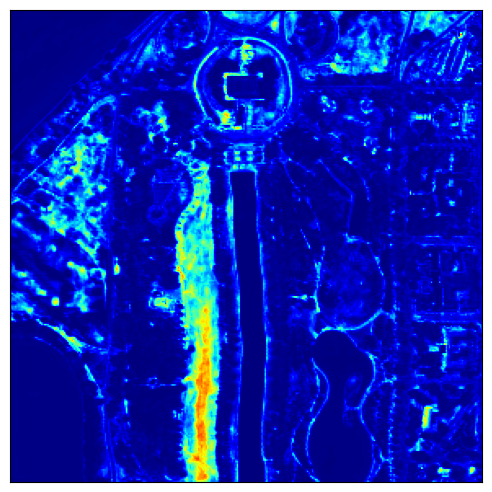

In [6]:
fig, axes = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor('white')
for i in range(len(rows)):
    for j in range(len(a_method)):
        axes.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
        axes.imshow(abd_all[abd_keys[j]][:, :, i], cmap='jet')
        fig.set_tight_layout({"pad":1, "h_pad":0.0, "w_pad":0.0, "rect":(0,0,1,1)})
        fig.savefig(f"./Images/{dataset}/Abundance/{a_method[j]}_{rows[i]}.pdf")

In [7]:
edm_keys = []
for key in edm_all:
    if key[0] == 'E':
        edm_keys.append(key)
edm_keys.remove('E_GT')
print(*edm_keys)

E_CYCU E_Coll E_NMF E_SiVM E_VCA E_uDAS E_Tra


In [8]:
edm_gt = edm_all["E_GT"]
for key in edm_keys:
    sad_cls, mean_sad = compute_sad(edm_all[key], edm_gt)
    for i, val in enumerate(sad_cls):
        sad_cls[i] = round(val, 4)
    print(f"SAD {key}: {sad_cls} {mean_sad:.4f}")

SAD E_CYCU: [0.0895, 0.2704, 0.4642, 0.95, 0.4205, 0.7906] 0.4975
SAD E_Coll: [0.3171, 0.3335, 0.3439, 0.0331, 0.0305, 0.3446] 0.2338
SAD E_NMF: [0.1952, 0.4507, 0.2243, 0.2078, 0.6736, 0.0615] 0.3022
SAD E_SiVM: [0.1851, 0.7258, 0.8608, 0.2826, 0.9495, 0.1754] 0.5299
SAD E_VCA: [0.317, 0.2883, 0.2316, 0.0343, 0.7766, 0.6472] 0.3825
SAD E_uDAS: [0.1897, 0.4251, 0.6585, 0.1992, 0.2328, 0.094] 0.2999
SAD E_Tra: [0.2379, 0.1225, 0.0781, 0.3352, 0.0533, 0.0951] 0.1537


In [9]:
wavelengths = wavelen[f"lambda_{dataset}"].flatten().round(0)
num_chn = len(wavelengths)
wavelengths = wavelengths.astype(int)

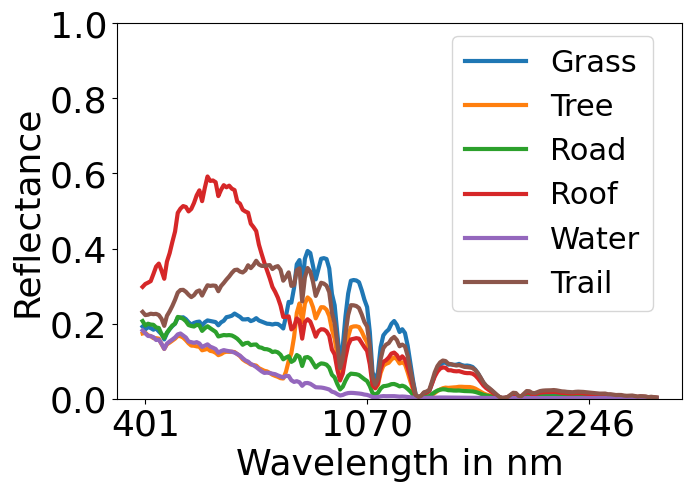

In [10]:
fig, axes = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('white')
axes.set_ylabel("Reflectance", fontsize=26)
axes.set_xlabel("Wavelength in nm", fontsize=26)
for i in range(len(rows)):
    axes.tick_params(labelsize=26)
    axes.set_ylim([0.0, 1.0])
    axes.set_xticks(range(1, num_chn+1, 82))
    axes.set_xticklabels(wavelengths[::82])
    axes.plot(edm_all["E_GT"][:, i], lw=3, label=rows[i])
fig.legend(fontsize=22, loc='upper left', bbox_to_anchor=(0.63, 0.95))
fig.set_tight_layout({"pad":1, "h_pad":0.0, "w_pad":0.0, "rect":(0,0,1,1)})    
fig.savefig(f"./Images/{dataset}_endmembers.pdf")

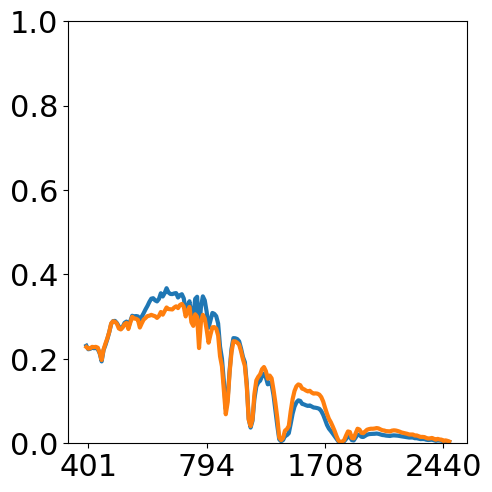

In [11]:
fig, axes = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor('white')
for i in range(len(rows)):
    for j in range(len(e_method)):
        axes.cla()
        axes.tick_params(labelsize=22)
        axes.set_ylim([0.0, 1.0])
        axes.set_xticks(range(1, num_chn+1, 62))
        axes.set_xticklabels(wavelengths[::62])
        axes.plot(edm_all["E_GT"][:, i], lw=3, label="GT")
        axes.plot(edm_all[edm_keys[j]][:, i], lw=3, label="Extracted")
#         fig.legend(fontsize=18, loc='upper right', bbox_to_anchor=(0.97, 0.95))
        fig.set_tight_layout({"pad":1, "h_pad":0.0, "w_pad":0.0, "rect":(0,0,1,1)})
        fig.savefig(f"./Images/{dataset}/Endmembers/{e_method[j]}_{rows[i]}.pdf")

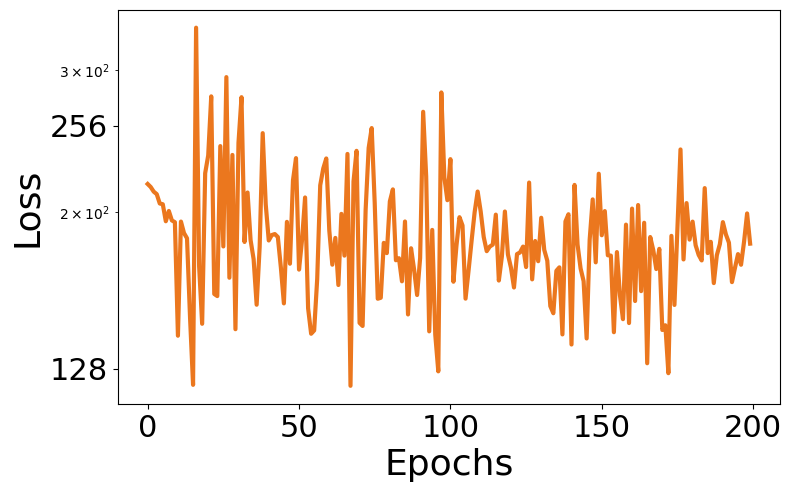

In [12]:
dataset="Samson"
losses = sio.loadmat(f"./trans_mod_{dataset.lower()}/{dataset.lower()}_losses.mat")
fig, axes = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('white')
axes.set_yscale('log')
axes.set_yticks([1, 2, 4, 8, 16, 32, 64, 128, 256, 512])
axes.tick_params(labelsize=22)
axes.set_ylabel("Loss", fontsize=26)
axes.set_xlabel("Epochs", fontsize=26)
axes.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
axes.plot(losses["losses"][0], lw=3, color="#eb771e")
fig.set_tight_layout({"pad":1, "h_pad":0.0, "w_pad":0.0, "rect":(0,0,1,1)})
fig.savefig(f"./Images/{dataset}_losses.pdf")